# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from  https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download. Here we show the pipeline for Mouse actin dataset. Save the dataset at an appropriate location. For us, the path is data folder which exists at `../../../`. For Mouse actin, the data to be denoised is named ```sample_attempt2.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse actin/'):
    os.mkdir('../../../data/Mouse actin/')

zipPath="../../../data/Mouse actin/Mouse_actin.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse actin/")


### Load Data
#### Check ```filename``` and specify the ```dataName```  

In [3]:
path='../../../data/Mouse actin/'
fileName='sample_attempt2.tif'
dataName='mouseactin' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse actin` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.2913355715572834+-(2SEM)0.05251318132322719      
Epoch 1 finished      
avg. loss: 0.26624093391001225+-(2SEM)0.09033495264479026      
Epoch 2 finished      
avg. loss: 0.3860762447118759+-(2SEM)0.14916900325174398      
Epoch 3 finished      
avg. loss: 0.361054864898324+-(2SEM)0.14869633585052924      
Epoch 4 finished      
avg. loss: 0.274025622010231+-(2SEM)0.11791023918482302      
Epoch 5 finished      
avg. loss: 0.26233926974236965+-(2SEM)0.11578840377132434      
Epoch 6 finished      
avg. loss: 0.3912672568112612+-(2SEM)0.13481178079761497      
Epoch 7 finished      
avg. loss: 0.2965333376079798+-(2SEM)0.0979246534412731      
Epoch 8 finished      
avg. loss: 0.29498354755342004+-(2SEM)0.11386420206216458      
Epoch 9 finished      
avg. loss: 0.2323489349335432+-(2SEM)0.0999468442375955      
Epoch 10 finished      
avg. loss: 0.287479430437088+-(2SEM)0.10318704213160096      
Epoch 11 finished      
avg. loss: 0.2934601463377476+-

Epoch 90 finished      
avg. loss: 0.2622336056083441+-(2SEM)0.08464500829916022      
Epoch    90: reducing learning rate of group 0 to 7.8125e-06.
Epoch 91 finished      
avg. loss: 0.24913434572517873+-(2SEM)0.08367850294393271      
Epoch 92 finished      
avg. loss: 0.2512132316827774+-(2SEM)0.09810219401770798      
Epoch 93 finished      
avg. loss: 0.286238095164299+-(2SEM)0.10765542716360858      
Epoch 94 finished      
avg. loss: 0.3336914196610451+-(2SEM)0.12796338931708567      
Epoch 95 finished      
avg. loss: 0.27737900950014593+-(2SEM)0.09671908120490762      
Epoch 96 finished      
avg. loss: 0.23941326402127744+-(2SEM)0.09131368063190047      
Epoch 97 finished      
avg. loss: 0.29817297458648684+-(2SEM)0.10618376589335517      
Epoch 98 finished      
avg. loss: 0.24999447166919708+-(2SEM)0.08894909330609113      
Epoch 99 finished      
avg. loss: 0.3031180925667286+-(2SEM)0.09058407618420405      
Epoch 100 finished      
avg. loss: 0.2883564218878746+-(2SEM)0.

avg. loss: 0.2651018787175417+-(2SEM)0.10912348856550627      
Epoch 178 finished      
avg. loss: 0.30613187737762926+-(2SEM)0.11362197489561726      
Epoch   178: reducing learning rate of group 0 to 3.0518e-08.
Epoch 179 finished      
avg. loss: 0.292514717951417+-(2SEM)0.0979897035045052      
Epoch 180 finished      
avg. loss: 0.34378452114760877+-(2SEM)0.12427460831773521      
Epoch 181 finished      
avg. loss: 0.39653572887182237+-(2SEM)0.13191045397290382      
Epoch 182 finished      
avg. loss: 0.3839124836027622+-(2SEM)0.12786654229700423      
Epoch 183 finished      
avg. loss: 0.31882660314440725+-(2SEM)0.1104140885212284      
Epoch 184 finished      
avg. loss: 0.39644211269915103+-(2SEM)0.12821571988702965      
Epoch 185 finished      
avg. loss: 0.24932098314166068+-(2SEM)0.10996655567314954      
Epoch 186 finished      
avg. loss: 0.31012128815054896+-(2SEM)0.1294533828338806      
Epoch 187 finished      
avg. loss: 0.4119996465742588+-(2SEM)0.1397221711953824

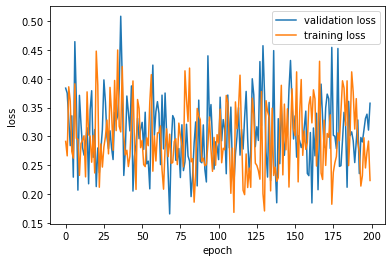

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()